In [44]:
import scipy.io
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

data = scipy.io.loadmat('satellite.mat')
df = {k:v for k, v in data.items() if k[0] != '_'}

X = np.array(df['X'])
y = np.array(df['y']).reshape(-1)

print("X:",X.shape)
print("y:",y.shape)

X: (6435, 36)
y: (6435,)


In [45]:
print(X[0])
print(y)

[ 92 115 120  94  84 102 106  79  84 102 102  83 101 126 133 103  92 112
 118  85  84 103 104  81 102 126 134 104  88 121 128 100  84 107 113  87]
[0 0 0 ... 1 1 1]


In [46]:
from collections import Counter
count = Counter(y)
print(count)

Counter({0: 4399, 1: 2036})


In [47]:
data.keys()

dict_keys(['X', 'y', '__version__', '__globals__', '__header__'])

In [48]:
data.items()

dict_items([('X', array([[ 92, 115, 120, ..., 107, 113,  87],
       [ 84, 102, 106, ...,  99, 104,  79],
       [ 84, 102, 102, ...,  99, 104,  79],
       ...,
       [ 56,  68,  91, ...,  83,  92,  74],
       [ 56,  68,  87, ...,  83,  92,  70],
       [ 60,  71,  91, ...,  79, 108,  92]], dtype=uint8)), ('y', array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=uint8)), ('__version__', '1.0'), ('__globals__', []), ('__header__', b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Tue Apr 26 19:11:01 2016')])

In [36]:
import timeit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

clf = SVC(kernel='rbf', C=100000, gamma="scale")
start = timeit.default_timer()
clf.fit(X_train,y_train)
scoretrain = clf.score(X_train,y_train)
scoretest  = clf.score(X_test,y_test)
stop = timeit.default_timer()
# C.append(scoretest)
# gamma.append(scoretest)
print("SVM for Non Linear\ngamma: {} Training Score : {:2f} Test Score : {:2f}\n".format(clf._gamma,scoretrain,scoretest))
print("Time: ",stop - start)

SVM for Non Linear
gamma: 6.157652067647825e-05 Training Score : 1.000000 Test Score : 0.902875

Time:  3.6748349000000076


In [8]:
print(X_test[:10])

[[ 68  69  74  57  64  66  71  54  64  69  71  57  64  75  75  59  68  71
   75  59  68  71  75  59  67  68  74  58  63  68  67  58  67  72  70  62]
 [ 71 112 122  96  71 112 122  96  71 112 122  96  71 111 123 100  71 111
  118 100  71 111 123 100  66 109 122  96  66 113 122  96  70 113 117 100]
 [ 82  96 100  81  82 100 104  78  82  96 104  81  79  99 105  83  83  95
  105  83  83  95 101  79  85 102 101  83  82 102 105  83  82 102 114  87]
 [ 56  68  83  74  64  83 100  85  64  95 104  85  51  68  81  71  59  72
   85  75  59  79  89  79  49  67  80  70  52  71  80  74  52  71  84  70]
 [ 55  51  77  67  55  54  77  62  59  48  74  54  56  49  69  55  56  53
   73  63  59  53  84  66  56  48  68  53  56  51  68  60  56  51  75  68]
 [ 49  32 127 133  46  34 127 129  49  32 127 133  42  32 124 135  46  32
  119 135  46  32 119 131  44  34 124 136  44  34 124 136  44  34 119 133]
 [ 85  97 101  80  82  97 101  76  82  97 101  80  88 102 102  79  80  98
   98  76  80  98 102  79  80  9

In [9]:
print(y_test[:10])

[0 0 0 0 1 1 0 0 1 0]


In [10]:
print(clf.predict(X_test)[:10])

[0 0 0 0 1 1 1 0 1 0]


In [49]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MinMaxScaler
import timeit

clf = neighbors.KNeighborsClassifier(10, weights='distance',algorithm="brute")
start = timeit.default_timer()
clf.fit(X_train, y_train)
T_score = clf.score(X_train, y_train)
score = clf.score(X_test, y_test)
stop = timeit.default_timer()
print("TrainScore: {}, TestScore: {}".format(T_score, score))
print("Time: {}".format(stop-start))

TrainScore: 1.0, TestScore: 0.9184149184149184
Time: 0.7802110000000084


In [16]:
print(clf.predict(X_test[:100]))
print(y_test[:100])

[0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0]
[0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0]


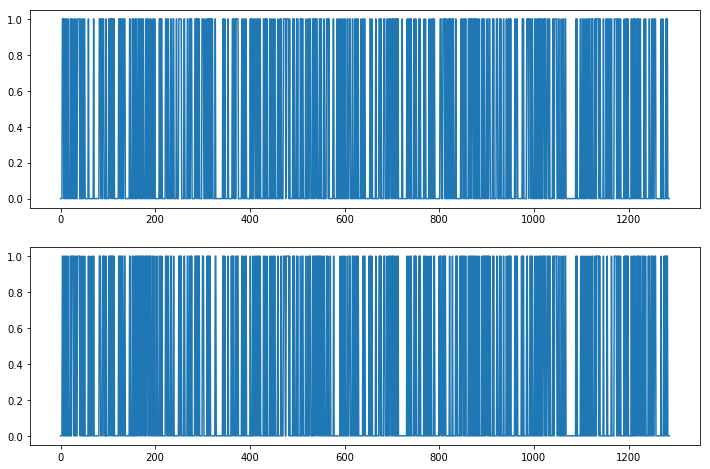

In [21]:
import matplotlib.pyplot as plt

plt.plots(clf.predict(X_test), y_test)

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Compare Testdata vs Predict', y=1.05, size = 15)
sns.heatmap(train.astype(float).corr(),linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)